In [3]:
!wget https://raw.githubusercontent.com/GeorgeMcIntire/fake_real_news_dataset/main/fake_and_real_news_dataset.csv -O fake_or_real_news.csv


--2025-06-29 16:04:45--  https://raw.githubusercontent.com/GeorgeMcIntire/fake_real_news_dataset/main/fake_and_real_news_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23021506 (22M) [text/plain]
Saving to: ‘fake_or_real_news.csv’

fake_or_real_news.c 100%[===================>]  21.95M   129MB/s    in 0.2s    

2025-06-29 16:04:46 (129 MB/s) - ‘fake_or_real_news.csv’ saved [23021506/23021506]



In [4]:
import pandas as pd

# Load the CSV into a pandas DataFrame
df = pd.read_csv("fake_or_real_news.csv")

# Show the first 5 rows
df.head()


,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


In [6]:
# Drop rows with missing titles
df = df.dropna(subset=['title'])

# Create title_length feature
df['title_length'] = df['title'].apply(len)

# Preview result
df[['title', 'title_length']].head()


/tmp/ipython-input-6-3138451196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_length'] = df['title'].apply(len)


,title,title_length
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,111
1,Study: women had to drive 4 times farther afte...,82
2,"Trump, Clinton clash in dueling DC speeches",43
3,Grand jury in Texas indicts activists behind P...,70
4,"As Reproductive Rights Hang In The Balance, De...",75


In [7]:
# Count how many exclamation marks (!) are in each title
df['exclaim_count'] = df['title'].apply(lambda x: str(x).count('!'))

# Preview the new feature
df[['title', 'exclaim_count']].head()


,title,exclaim_count
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,0
1,Study: women had to drive 4 times farther afte...,0
2,"Trump, Clinton clash in dueling DC speeches",0
3,Grand jury in Texas indicts activists behind P...,0
4,"As Reproductive Rights Hang In The Balance, De...",0


In [8]:
import re

# Check if title contains any ALL CAPS word (3+ letters)
def has_all_caps(title):
    if pd.isnull(title): return 0
    return 1 if re.search(r'\b[A-Z]{3,}\b', title) else 0

df['has_all_caps'] = df['title'].apply(has_all_caps)

# Preview results
df[['title', 'has_all_caps']].head()


,title,has_all_caps
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,0
1,Study: women had to drive 4 times farther afte...,0
2,"Trump, Clinton clash in dueling DC speeches",0
3,Grand jury in Texas indicts activists behind P...,0
4,"As Reproductive Rights Hang In The Balance, De...",0


In [9]:
from textblob import TextBlob

# Sentiment polarity ranges from -1 (negative) to +1 (positive)
df['sentiment_score'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Preview results
df[['title', 'sentiment_score']].head()


,title,sentiment_score
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,0.00
1,Study: women had to drive 4 times farther afte...,-0.10
2,"Trump, Clinton clash in dueling DC speeches",0.00
3,Grand jury in Texas indicts activists behind P...,0.05
4,"As Reproductive Rights Hang In The Balance, De...",0.00


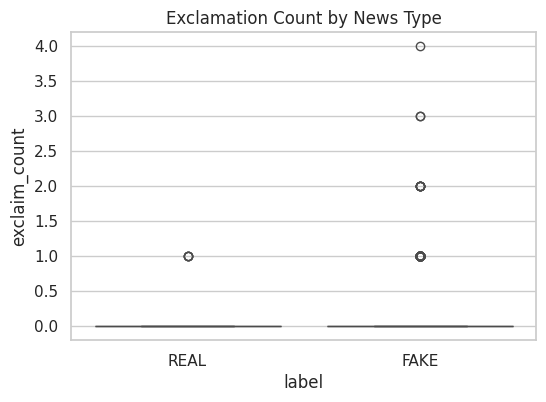

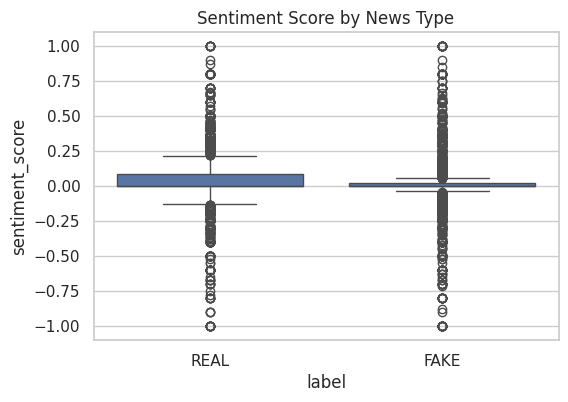

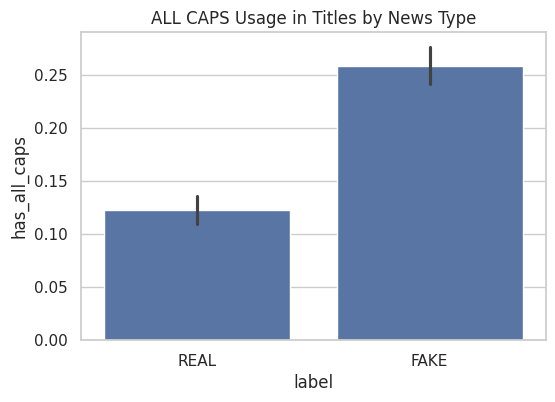

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Exclamation Count vs. Label
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='exclaim_count', data=df)
plt.title("Exclamation Count by News Type")
plt.show()

# 2. Sentiment Score vs. Label
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='sentiment_score', data=df)
plt.title("Sentiment Score by News Type")
plt.show()

# 3. ALL CAPS Proportion by Label
plt.figure(figsize=(6,4))
sns.barplot(x='label', y='has_all_caps', data=df)
plt.title("ALL CAPS Usage in Titles by News Type")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and labels
features = ['title_length', 'exclaim_count', 'has_all_caps', 'sentiment_score']
X = df[features]
y = df['label'].map({'FAKE': 0, 'REAL': 1})  # Convert labels to binary

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6071817192600653

Confusion Matrix:
 [[241 209]
 [152 317]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57       450
           1       0.60      0.68      0.64       469

    accuracy                           0.61       919
   macro avg       0.61      0.61      0.60       919
weighted avg       0.61      0.61      0.61       919



In [12]:
def predict_headline(headline):
    # Create features from the headline
    features = {
        'title_length': len(headline),
        'exclaim_count': headline.count('!'),
        'has_all_caps': 1 if re.search(r'\b[A-Z]{3,}\b', headline) else 0,
        'sentiment_score': TextBlob(headline).sentiment.polarity
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([features])

    # Predict
    prediction = model.predict(input_df)[0]

    return "REAL" if prediction == 1 else "FAKE"
